In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import math
import matplotlib.pyplot as plt

#import wrangle as w
#import explore as e
#import env
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PolynomialFeatures

import warnings
warnings.filterwarnings("ignore")

## For all our statistical analysis, I will use a confidence of 95% so our alpha = 0.05
## results with a p-value less than alpha will be considered significant

In [2]:
def split_wine(df):
    '''
    This function performs split on WineQT data, stratify quality.
    Returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.quality)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.quality)
    return train, validate, test

In [3]:
pd.read_csv('Wine_Viable.csv')

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_viable
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,False
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1,False
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2,False
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3,True
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592,True
1139,1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593,True
1140,1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594,False
1141,1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595,True


In [4]:
df = pd.read_csv('Wine_Viable.csv')

In [5]:
train, validate, test = split_wine(df)

In [6]:
train

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_viable
240,240,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7,339,True
818,818,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.100000,6,1153,True
1026,1026,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,1439,True
692,692,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.300000,6,985,True
159,159,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.000000,6,223,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1011,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.900000,5,1419,False
783,783,10.8,0.470,0.43,2.1,0.171,27.0,66.0,0.99820,3.17,0.76,10.800000,6,1109,True
558,558,8.3,0.430,0.30,3.4,0.079,7.0,34.0,0.99788,3.36,0.61,10.500000,5,778,False
976,976,8.2,0.885,0.20,1.4,0.086,7.0,31.0,0.99460,3.11,0.46,10.000000,5,1376,False


In [7]:
train.quality.value_counts()

5    270
6    259
7     80
4     18
8      9
3      3
Name: quality, dtype: int64

In [8]:
len(train)

639

In [9]:
def get_ind_ttest_volacid(train):

    viable_sample=train[train.is_viable==True]['volatile acidity']
    not_viable_sample=train[train.is_viable==False]['volatile acidity']
    overall_mean = train['volatile acidity'].mean()

    t, p = stats.ttest_ind(not_viable_sample, viable_sample, equal_var=False)
    print(f't     = {t:.4f}')
    print(f'p     = {p:.4f}')

### Countplot of quality in Train

<AxesSubplot:xlabel='quality', ylabel='count'>

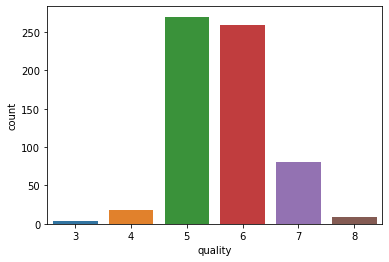

In [10]:
sb.countplot(x=train.quality)

In [11]:
train.quality.value_counts()

5    270
6    259
7     80
4     18
8      9
3      3
Name: quality, dtype: int64

### Scatterplot of citric acid vs volatile acidity in Train

<AxesSubplot:xlabel='citric acid', ylabel='volatile acidity'>

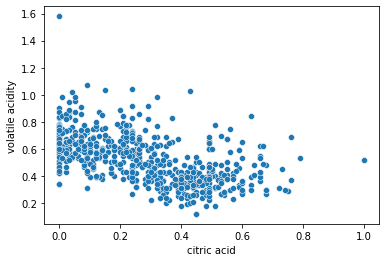

In [12]:
sb.scatterplot(data=train, x=train['citric acid'],y=train['volatile acidity'])

### scatterplot of quality vs volatile acidity, moves forward

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

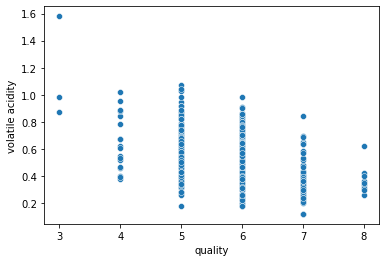

In [13]:
sb.scatterplot(data=train, x=train['quality'],y=train['volatile acidity'])

In [26]:
def get_ind_ttest_volacid(train):

    viable_sample=train[train.is_viable==True]['volatile acidity']
    not_viable_sample=train[train.is_viable==False]['volatile acidity']
    overall_mean = train['volatile acidity'].mean()

    t, p = stats.ttest_ind(not_viable_sample, viable_sample, equal_var=False)
    print(f't     = {t:.4f}')
    print(f'p     = {p:.4f}')

In [27]:
get_ind_ttest_volacid(train)

t     = 8.8387
p     = 0.0000


#### p-value less than our alpha, we will use volatile acid for modeling

### Barplot of quality vs citric acid

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

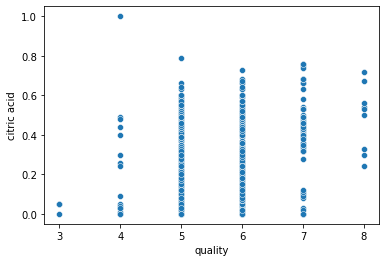

In [15]:
sb.scatterplot(data=train, x=train['quality'],y=train['citric acid'])

In [ ]:
viable_sample=train[train.is_viable==True]['volatile acidity']
not_viable_sample=train[train.is_viable==False]['volatile acidity']
overall_mean = train['volatile acidity'].mean()

t, p = stats.ttest_ind(not_viable_sample, viable_sample, equal_var=False)
print(f't     = {t:.4f}')
print(f'p     = {p:.4f}')

### Barplot of quality vs fixed acidity

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

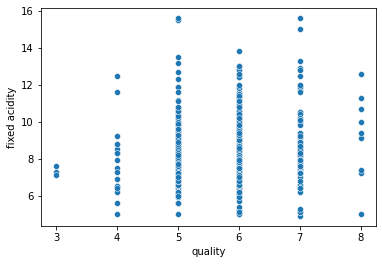

In [16]:
sb.scatterplot(data=train, x=train['quality'],y=train['fixed acidity'])

### Barplot of quality vs pH

<AxesSubplot:xlabel='quality', ylabel='pH'>

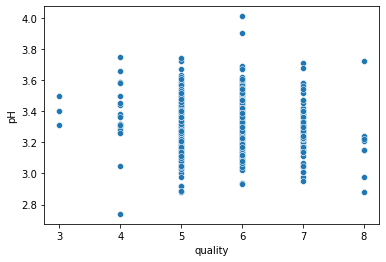

In [17]:
sb.scatterplot(data=train, x=train['quality'],y=train['pH'])

### Barplot of quality vs sulphates

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

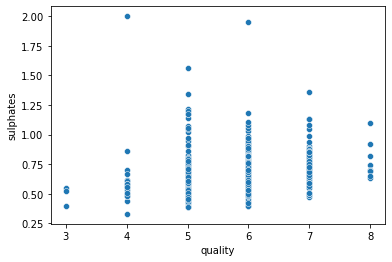

In [18]:
sb.scatterplot(data=train, x=train['quality'],y=train['sulphates'])

### Barplot of quality vs alcohol

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

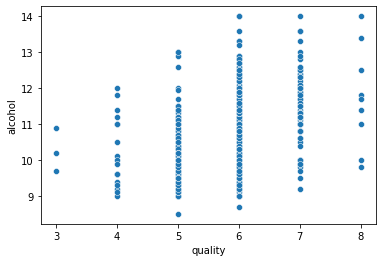

In [19]:
sb.scatterplot(data=train, x=train['quality'],y=train['alcohol'])

In [20]:
train.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id,is_viable
240,240,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7,339,True
818,818,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.100000,6,1153,True
1026,1026,7.3,0.670,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,1439,True
692,692,7.4,0.580,0.00,2.0,0.064,7.0,11.0,0.99562,3.45,0.58,11.300000,6,985,True
159,159,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.000000,6,223,True


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

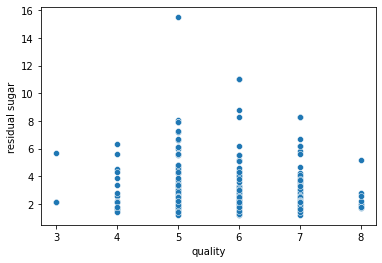

In [21]:
sb.scatterplot(data=train, x=train['quality'],y=train['residual sugar'])

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

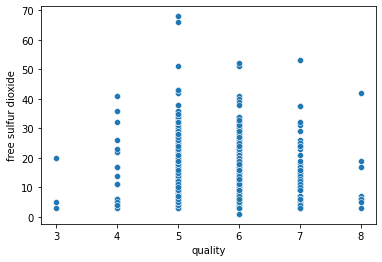

In [22]:
sb.scatterplot(data=train, x=train['quality'],y=train['free sulfur dioxide'])

In [23]:
for i in 

SyntaxError: invalid syntax (3996493703.py, line 1)